# Credit Card Classification Project Using SVM Algorithm

## 

### Import Packages 

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

### Load & Inspect Data

In [115]:
df = pd.read_csv('UniversalBank.csv')

In [116]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [117]:
df.shape

(5000, 14)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [145]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [119]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [120]:
df.duplicated().sum()

0

## EDA

In [121]:
df[{'Age','Experience','Income','Family','CCAvg','Mortgage'}].describe().round(2).T

count   mean     std   min   25%   50%    75%    max
Age         5000.0  45.34   11.46  23.0  35.0  45.0   55.0   67.0
Family      5000.0   2.40    1.15   1.0   1.0   2.0    3.0    4.0
Income      5000.0  73.77   46.03   8.0  39.0  64.0   98.0  224.0
CCAvg       5000.0   1.94    1.75   0.0   0.7   1.5    2.5   10.0
Mortgage    5000.0  56.50  101.71   0.0   0.0   0.0  101.0  635.0
Experience  5000.0  20.10   11.47  -3.0  10.0  20.0   30.0   43.0

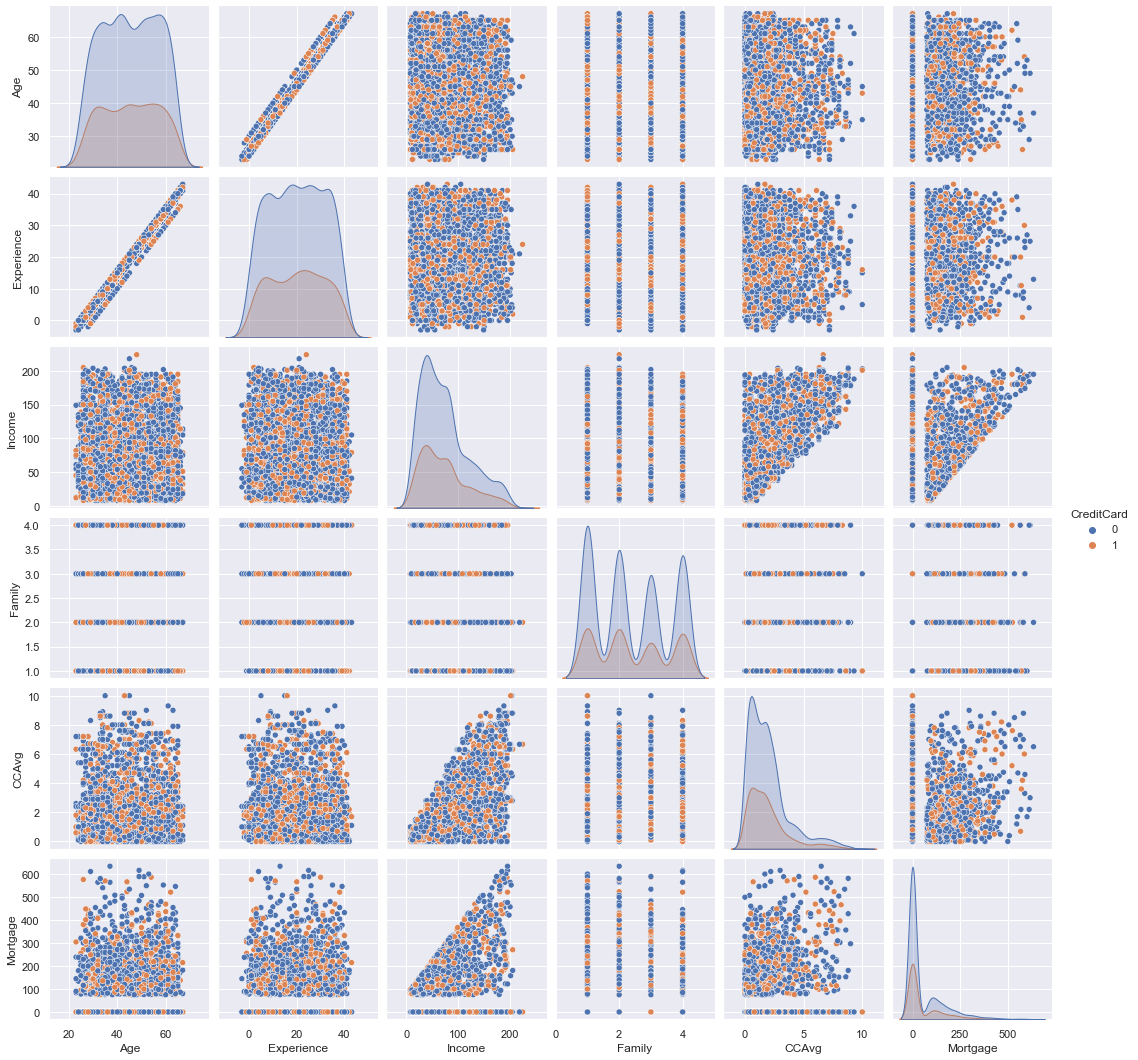

In [122]:
sns.pairplot(df.drop({'ID','ZIP Code',
       'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online'},axis=1),hue='CreditCard')

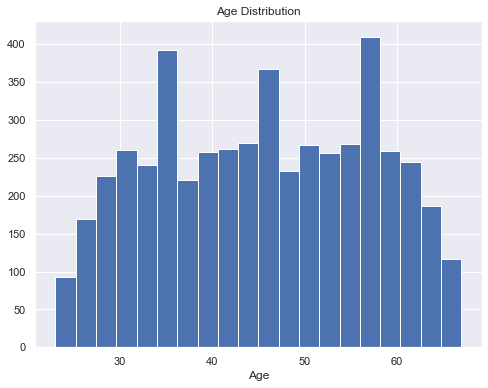

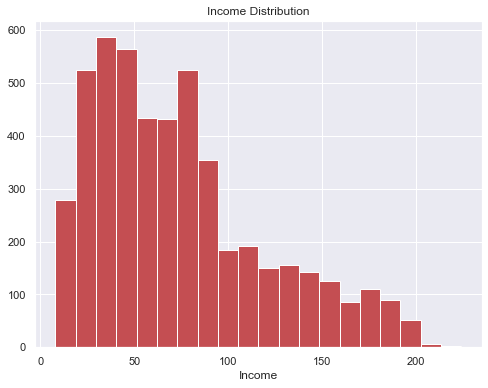

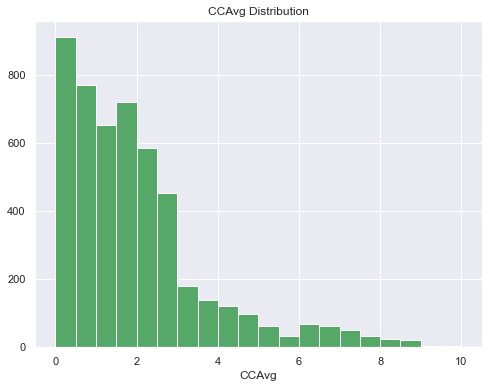

In [123]:
plt.title('Age Distribution')
df['Age'].hist(bins=20,figsize=(8,6),)
plt.xlabel('Age')
plt.show()

plt.title('Income Distribution')
df['Income'].hist(bins=20,figsize=(8,6),color='r')
plt.xlabel('Income')
plt.show()

plt.title('CCAvg Distribution')
df['CCAvg'].hist(bins=20,figsize=(8,6),color='g')
plt.xlabel('CCAvg')
plt.show()

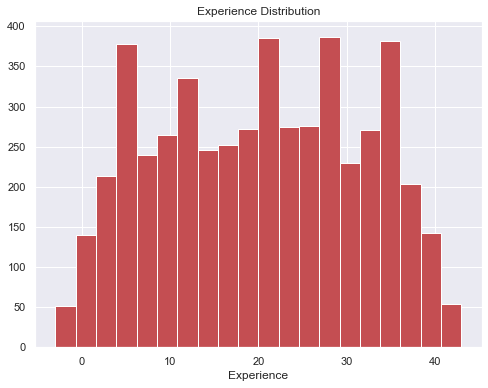

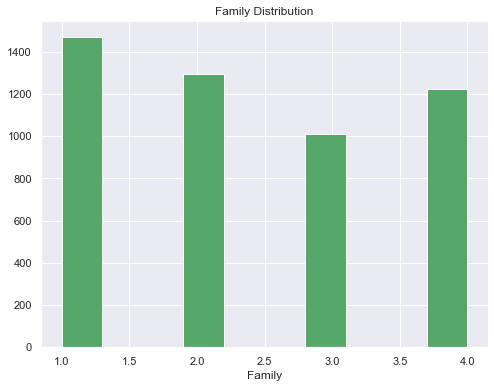

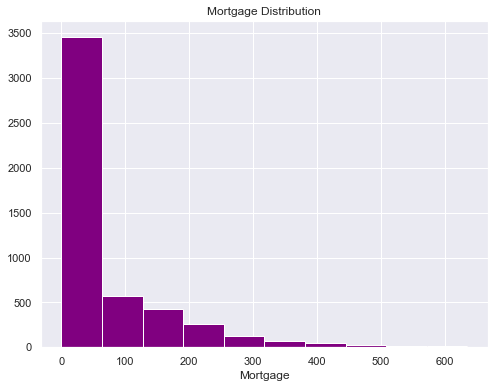

In [124]:
plt.title('Experience Distribution')
df['Experience'].hist(bins=20,figsize=(8,6),color='r')
plt.xlabel('Experience')
plt.show()

plt.title('Family Distribution')
df['Family'].hist(figsize=(8,6),color='g')
plt.xlabel('Family')
plt.show()

plt.title('Mortgage Distribution')
df['Mortgage'].hist(figsize=(8,6),color='purple')
plt.xlabel('Mortgage')
plt.show()

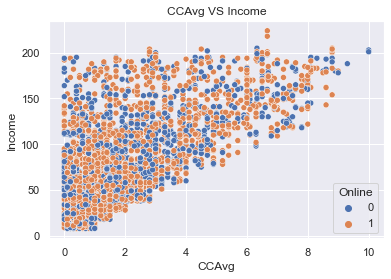

In [125]:
plt.title('CCAvg VS Income')
sns.scatterplot(data=df,x='CCAvg',y='Income',hue='Online')
plt.show()


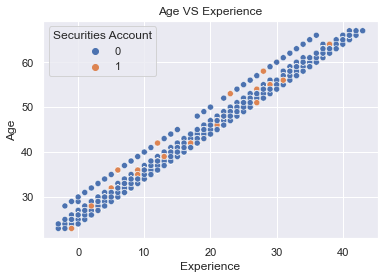

In [126]:
plt.title('Age VS Experience')
sns.scatterplot(data=df,x='Experience',y='Age',hue='Securities Account')
plt.show()

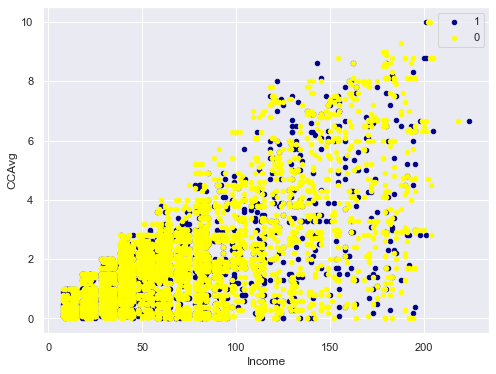

In [127]:
# plt.figure(figsize=(8,6))
ax = df[df['CreditCard'] == 1][3:].plot(kind='scatter', x='Income', y='CCAvg', color='DarkBlue', label='1',figsize=(8,6))
df[df['CreditCard'] == 0][3:].plot(kind='scatter', x='Income', y='CCAvg', color='Yellow', label='0', ax = ax)
plt.show()

In [128]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [129]:
df.groupby('CreditCard')['Age','Experience','Income','Family','CCAvg','Mortgage'].mean().round(2)

Age  Experience  Income  Family  CCAvg  Mortgage
CreditCard                                                    
0           45.28       20.04   73.85    2.39   1.95     56.97
1           45.47       20.26   73.60    2.42   1.92     55.36

In [130]:
df.groupby('Personal Loan')['Mortgage','Age','Experience','Income','Family','CCAvg'].mean().round(2)

Mortgage    Age  Experience  Income  Family  CCAvg
Personal Loan                                                    
0                 51.79  45.37       20.13   66.24    2.37   1.73
1                100.85  45.07       19.84  144.75    2.61   3.91

In [131]:
df.groupby('Education')['Mortgage','Age','Experience','Income','Family','CCAvg'].mean().round(2)

Mortgage    Age  Experience  Income  Family  CCAvg
Education                                                    
1             61.63  44.96       20.07   85.59    2.24   2.26
2             51.32  45.04       19.77   64.31    2.65   1.69
3             54.18  46.14       20.47   66.12    2.38   1.72

<AxesSubplot: >

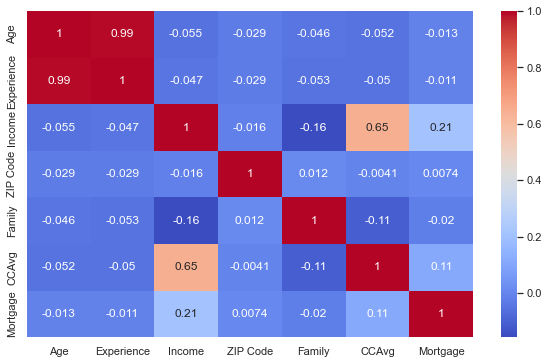

In [132]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop({'ID',
       'Education', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online','CreditCard'},axis=1).corr(),annot=True,cmap='coolwarm')

### Data Preprocessing

In [133]:
df.drop('ZIP Code',inplace=True,axis=1)

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()
x = df.drop('CreditCard',axis=1)

In [136]:
x = scaler.fit_transform(x)
y = df['CreditCard']
x[:1]

array([[-1.73170443, -1.77441684, -1.66607847, -0.53822878,  1.39741398,
        -0.19338544, -1.04907792, -0.55552393, -0.32587527,  2.92891517,
        -0.25354028, -1.21661774]])

### Build & Train The Model

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [138]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3500, 12) (3500,)
Test set: (1500, 12) (1500,)


In [139]:
from sklearn import svm
model = svm.SVC(kernel='sigmoid')

In [140]:
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [141]:
pred = model.predict(X_test)

### Model Evaluation

In [142]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average='weighted') 

0.6280567229472338

In [143]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pred, y_test))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1108
           1       0.32      0.35      0.33       392

    accuracy                           0.63      1500
   macro avg       0.54      0.54      0.54      1500
weighted avg       0.64      0.63      0.64      1500

[[814 256]
 [294 136]]


## 